https://pbpython.com/groupby-agg.html

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pwd = os.getcwd()

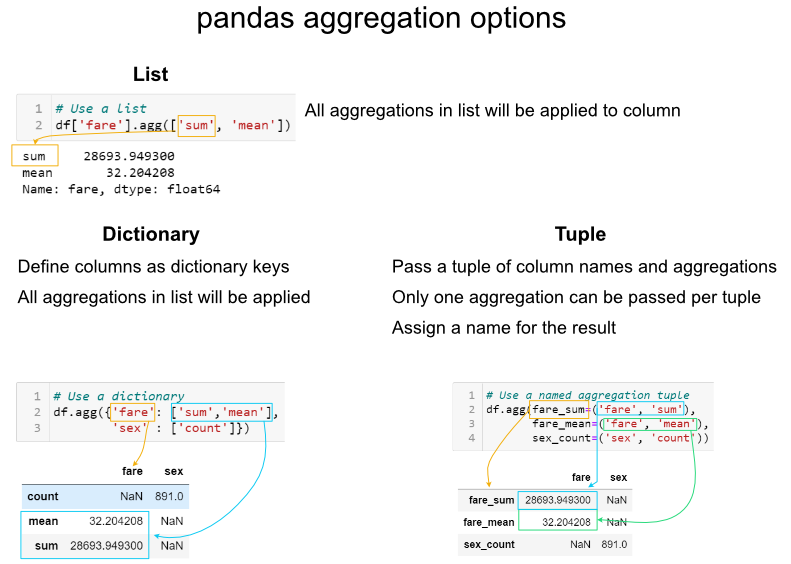

In [4]:
Image(filename=pwd+'\\agg-options.png')

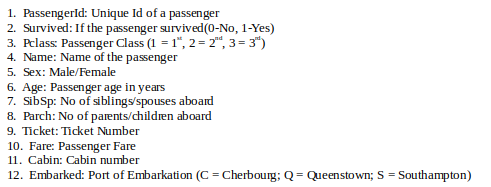

In [5]:
Image(filename=pwd+'\\column_description3.png')

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
train['survived'].agg(['mean','sum'])

mean      0.383838
sum     342.000000
Name: survived, dtype: float64

In [21]:
train.agg(dict.fromkeys(['survived','fare'],['sum','mean']))

,survived,fare
sum,342.000000,28693.949300
mean,0.383838,32.204208


In [9]:
traintemp = train.groupby(['embark_town','class'],as_index=False).agg({'fare' : 'describe'})
traintemp.columns = ['_'.join(col).rstrip('_') for col in traintemp.columns]
traintemp.round(2)

,embark_town,class,fare_count,fare_mean,fare_std,fare_min,fare_25%,fare_50%,fare_75%,fare_max
0,Cherbourg,First,85.0,104.72,99.09,26.55,49.50,78.27,110.88,512.33
1,Cherbourg,Second,17.0,25.36,11.35,12.00,13.86,24.00,37.00,41.58
2,Cherbourg,Third,66.0,11.21,4.87,4.01,7.23,7.90,14.46,22.36
3,Queenstown,First,2.0,90.00,0.00,90.00,90.00,90.00,90.00,90.00
4,Queenstown,Second,3.0,12.35,0.00,12.35,12.35,12.35,12.35,12.35
5,Queenstown,Third,72.0,11.18,6.72,6.75,7.75,7.75,10.22,29.12
6,Southampton,First,127.0,70.36,58.81,0.00,29.25,52.00,83.48,263.00
7,Southampton,Second,164.0,20.33,13.63,0.00,13.00,13.50,26.00,73.50
8,Southampton,Third,353.0,14.64,13.28,0.00,7.85,8.05,16.10,69.55


In [22]:
train.groupby(['embark_town','class']).agg({'fare':'sum'}).assign(pct_total=lambda x:x/x.sum()).reset_index().round(2)

,embark_town,class,fare,pct_total
0,Cherbourg,First,8901.07,0.31
1,Cherbourg,Second,431.09,0.02
2,Cherbourg,Third,740.13,0.03
3,Queenstown,First,180.00,0.01
4,Queenstown,Second,37.05,0.00
5,Queenstown,Third,805.20,0.03
6,Southampton,First,8936.34,0.31
7,Southampton,Second,3333.70,0.12
8,Southampton,Third,5169.36,0.18


## it's pandas.DataFrame.assign

In [11]:
train.groupby('deck').agg({'embark_town' : 'size'}).assign(test=lambda x: x/x.sum()).reset_index()

,deck,embark_town,test
0,A,15,0.073892
1,B,47,0.231527
2,C,59,0.290640
3,D,33,0.162562
4,E,32,0.157635
5,F,13,0.064039
6,G,4,0.019704


In [26]:
pd.crosstab(train['deck'],train['embark_town'],normalize=True).round(3)

embark_town,Cherbourg,Queenstown,Southampton
deck,,,
A,0.035,0.000,0.040
B,0.109,0.000,0.114
C,0.104,0.010,0.179
D,0.065,0.000,0.100
E,0.025,0.005,0.129
F,0.005,0.005,0.055
G,0.000,0.000,0.020


### The major distinction to keep in mind is that count will not include ***NaN*** values whereas size will. Depending on the data set, this may or may not be a useful distinction. In addition, the nunique function will exclude ***NaN*** values in the unique counts.

In [12]:
train.groupby('embark_town')['fare'].agg(['median','mean','skew',pd.Series.mode,pd.Series.kurt]).round(2)

,median,mean,skew,mode,kurt
embark_town,,,,,
Cherbourg,29.70,59.95,3.33,7.23,13.96
Queenstown,7.75,13.28,4.35,7.75,21.38
Southampton,13.00,27.08,3.65,8.05,16.63


### The key point is that you can use any function you want as long as it knows how to interpret the array of pandas values and returns a single value.

In [13]:
train.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
from matplotlib import pyplot as plt

In [15]:
train['age'].fillna(train['age'].median(),inplace=True)
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
train['died'] = 1 - train['survived']

<AxesSubplot:title={'center':'Survival based on the gender'}, xlabel='sex'>

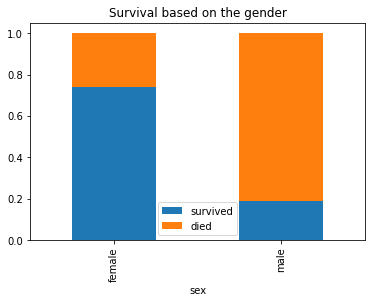

In [17]:
train.groupby('sex')[['survived','died']].mean().plot(kind='bar',stacked=True,title='Survival based on the gender')

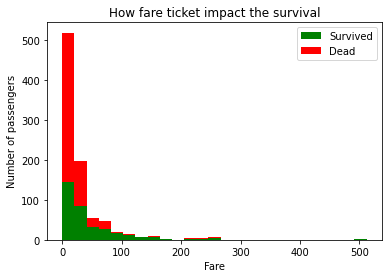

In [18]:
plt.hist([
    train[train['survived'] == 1]['fare'], train[train['survived'] == 0]['fare']],
    stacked=True,color=['green','red'],label=['Survived','Dead'],bins=25
)
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.title('How fare ticket impact the survival')
plt.show()

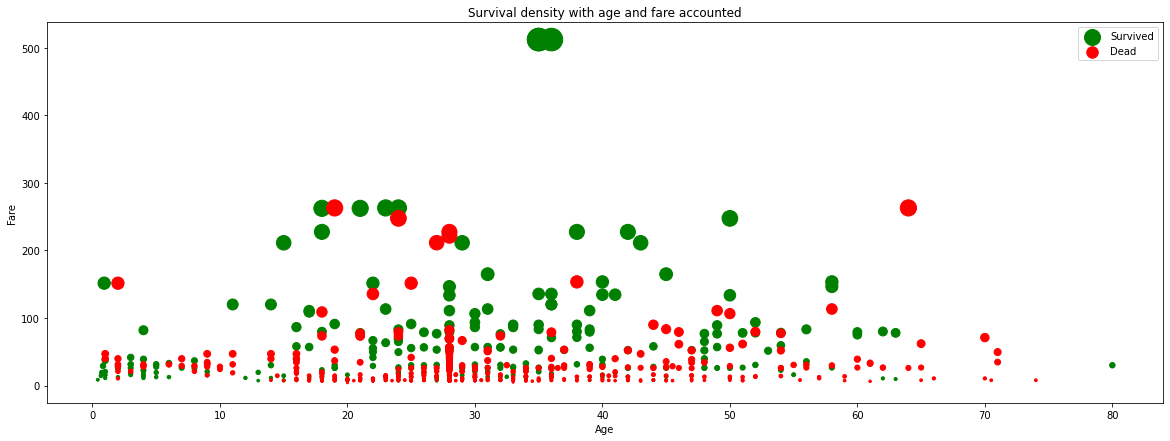

In [19]:
plt.figure(figsize=(20, 7))
plt.scatter(
    train[train['survived'] == 1]['age'], train[train['survived'] == 1]['fare'], c='green', s=train[train['survived'] == 1]['fare'],
    label = 'Survived'
)
plt.scatter(
    train[train['survived'] == 0]['age'], train[train['survived'] == 0]['fare'], c='red', s=train[train['survived'] == 0]['fare'],
    label = 'Dead'
)
plt.title('Survival density with age and fare accounted')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

<AxesSubplot:ylabel='survived'>

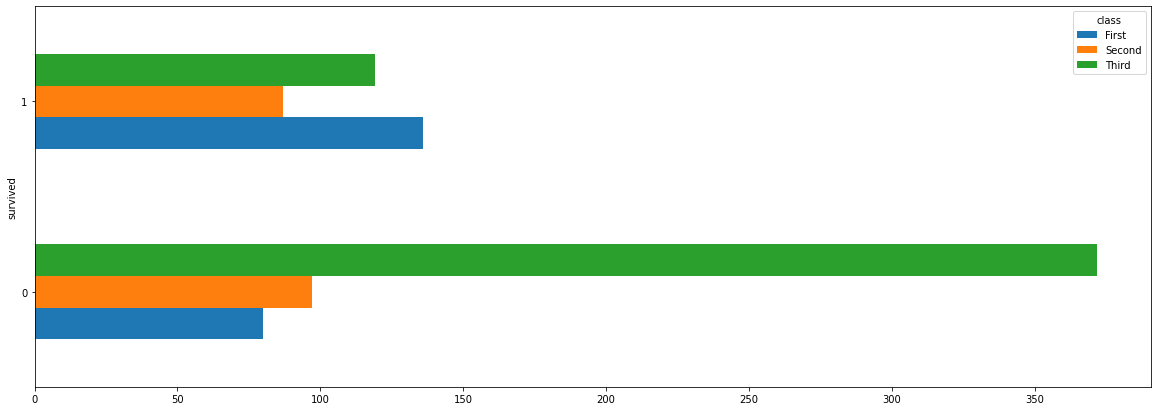

In [20]:
pivot = pd.pivot_table(train,index='survived',columns='class',values='adult_male',aggfunc='count')
pivot.plot(kind='barh',figsize=(20,7))

<Figure size 1080x504 with 0 Axes>

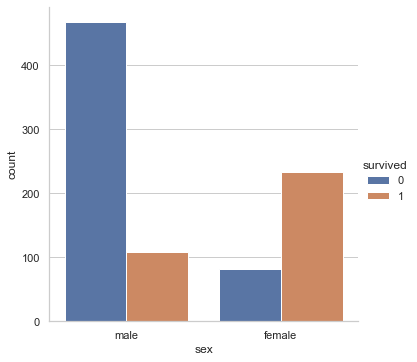

In [16]:
plt.figure(figsize=(15,7))
sns.catplot(x ="sex", hue ="survived", kind ="count", data = train)

<AxesSubplot:xlabel='survived', ylabel='pclass'>

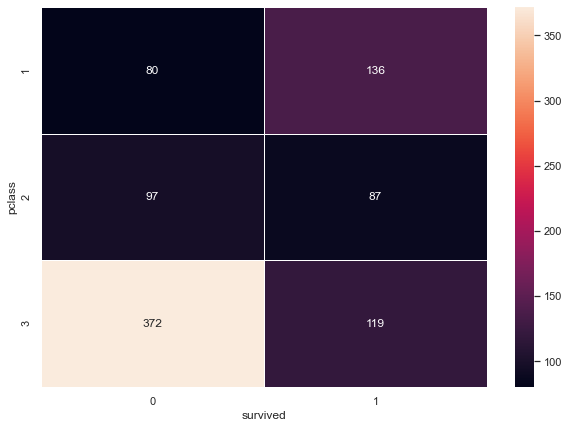

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(pd.crosstab(train['pclass'],train['survived']), annot=True, fmt='d', linewidths=.5, cmap='rocket')

<AxesSubplot:xlabel='sex', ylabel='age'>

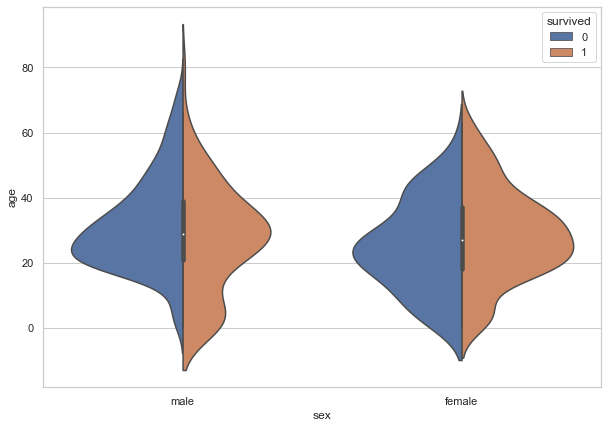

In [43]:
plt.figure(figsize=(10,7))
sns.violinplot(x='sex', y='age', hue='survived', data=train, split=True)